In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:

from google.colab import files
uploaded=files.upload()


Saving 167541742823060ec2379f8793842aa5b168a_.csv to 167541742823060ec2379f8793842aa5b168a_.csv


In [ ]:
df = pd.read_csv("167541742823060ec2379f8793842aa5b168a_.csv")

In [ ]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [ ]:
print('term \n',df.age.unique())
print('\n')
print('term \n',df.rest_bps.unique())
print('\n')
print('term \n',df.cholestrol.unique())
print('\n')
print('term \n',df.thalach.unique())
print('\n')
print('term \n',df.old_peak.unique())
print('\n')
print('term \n',df.target.unique())
print('\n')


term 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


term 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


term 
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


term 
 [150 187 172 178 163 1

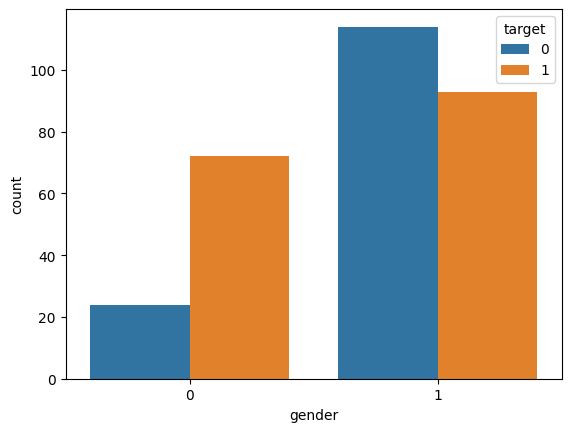

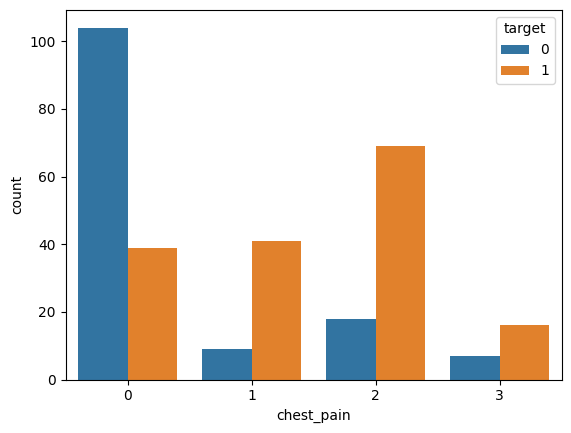

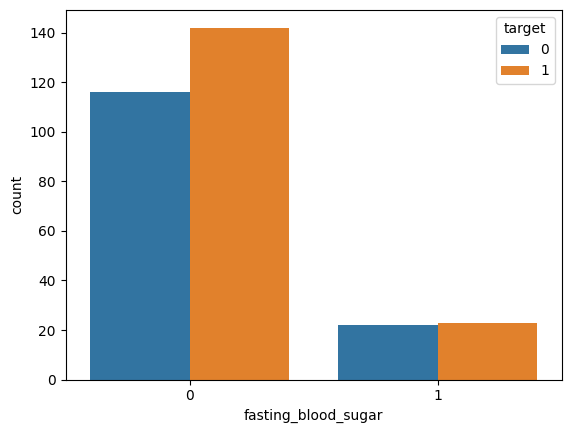

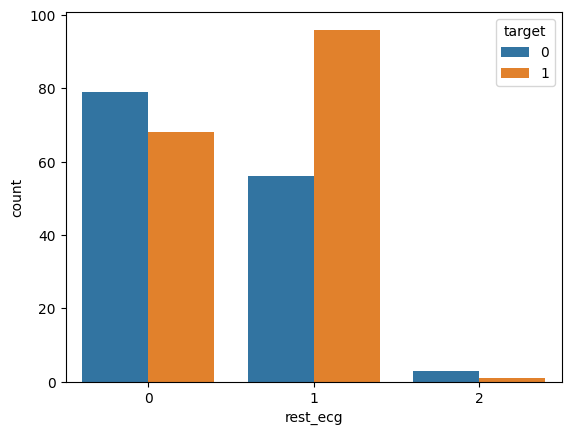

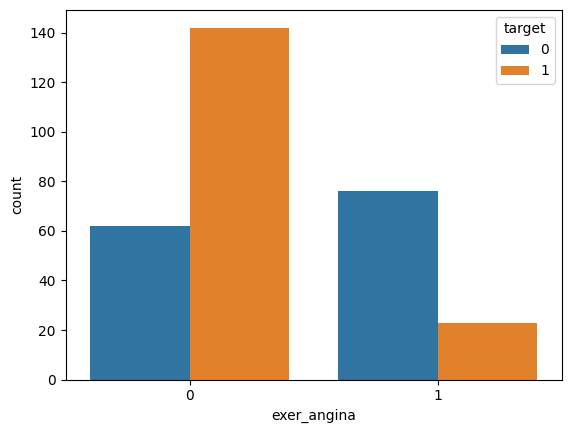

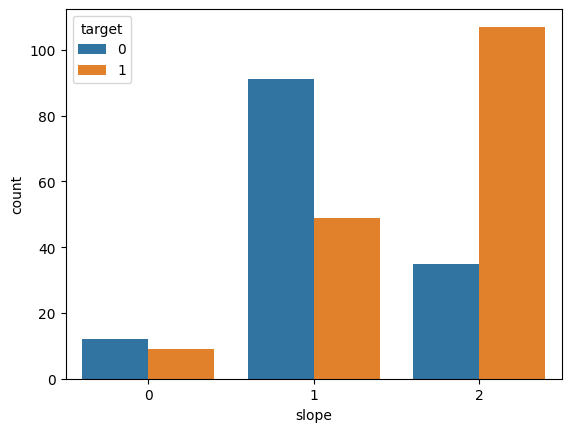

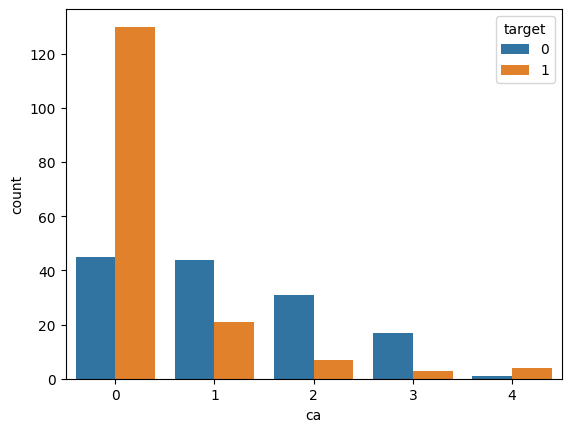

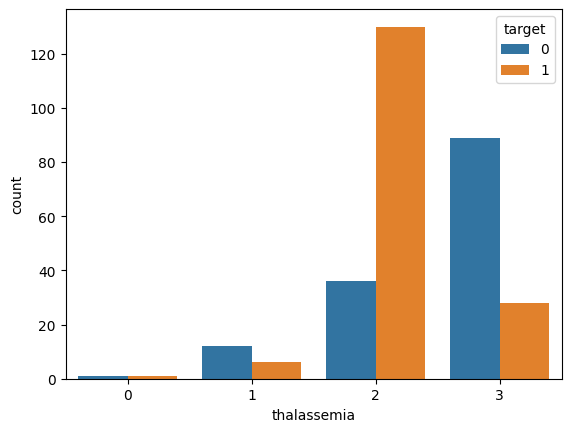

In [ ]:
cols=['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']
for i in cols:
    sns.countplot(x=df[i],data=df,hue='target')
    plt.show()

<Axes: xlabel='age', ylabel='count'>

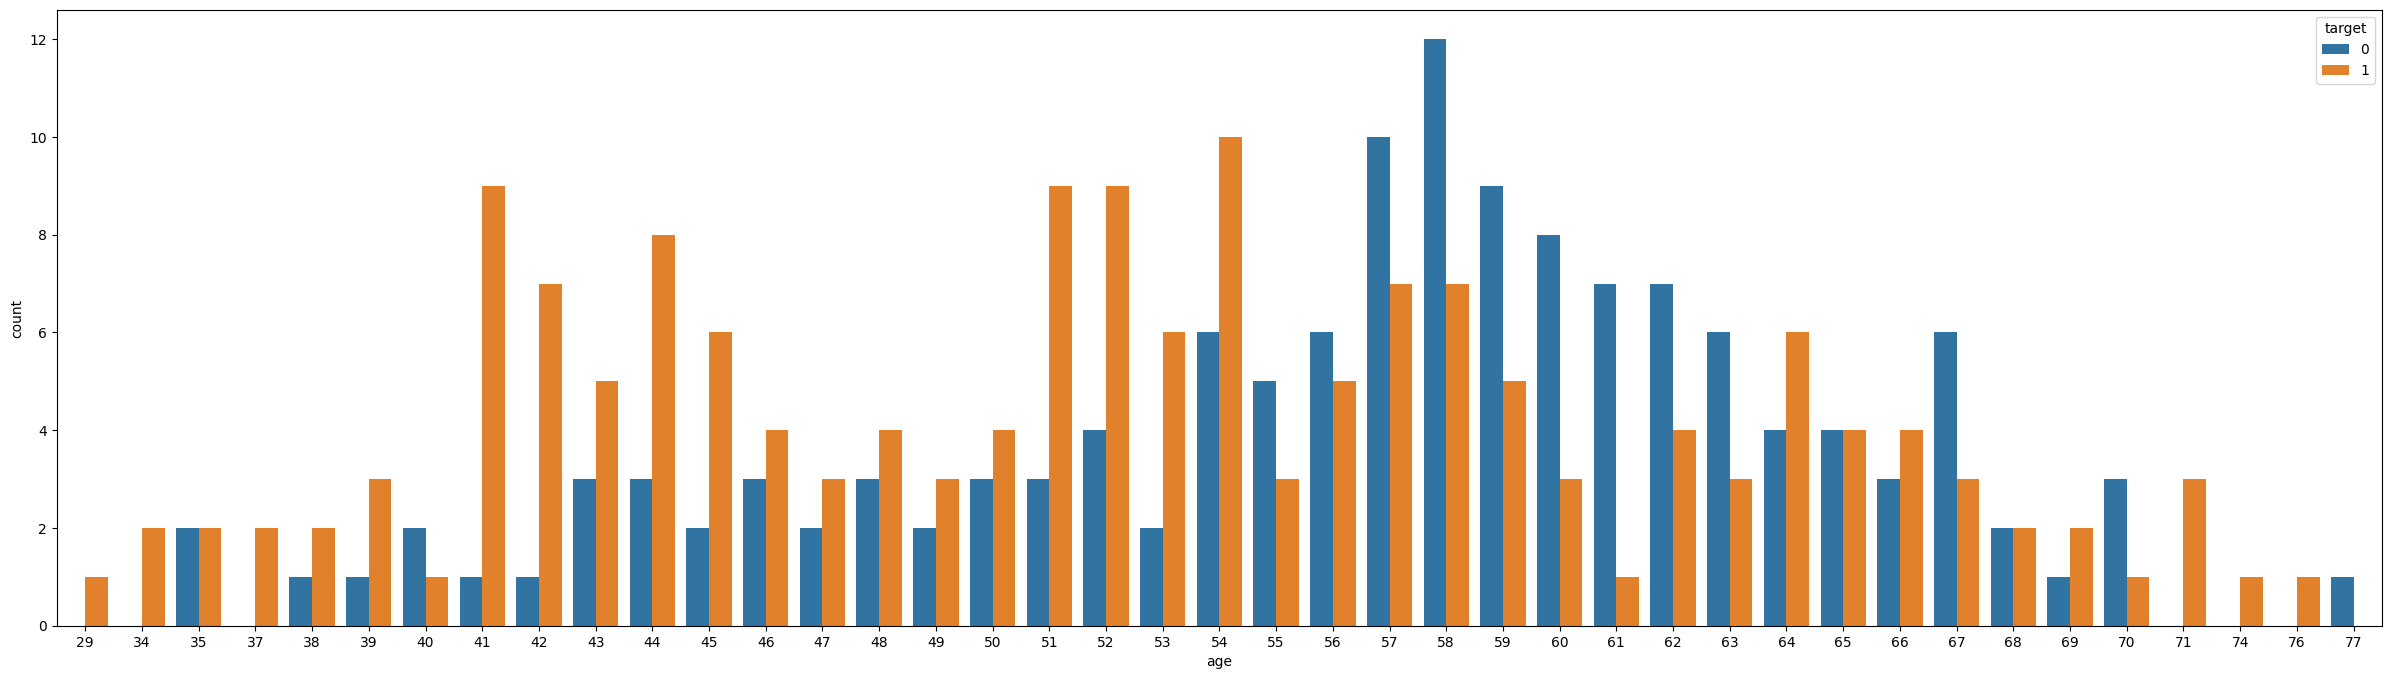

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(data=df, x='age', hue='target')

<Axes: xlabel='rest_bps', ylabel='count'>

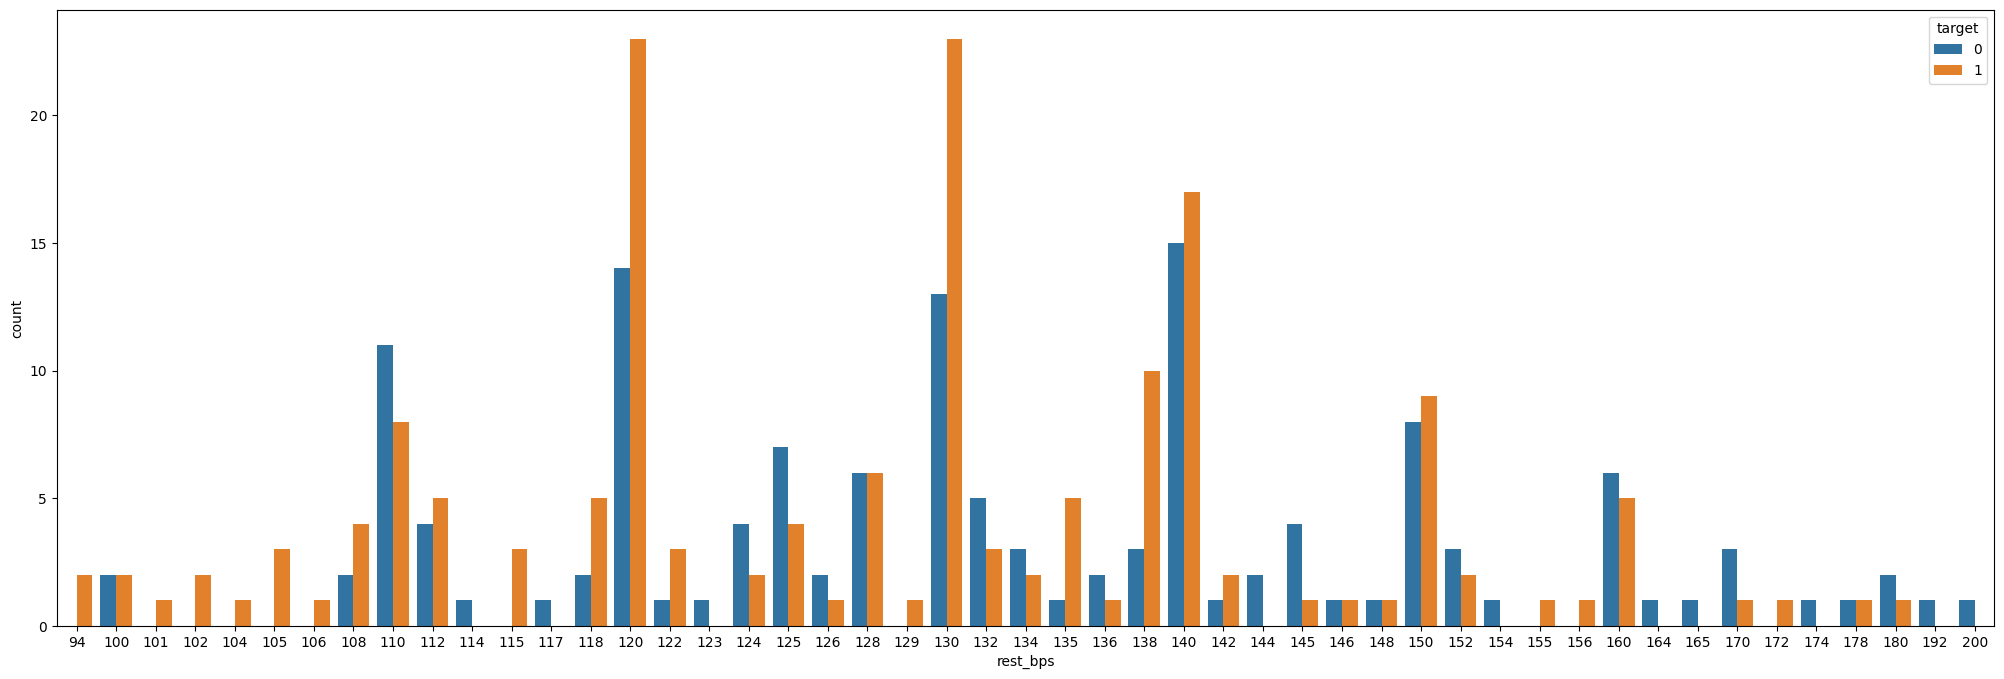

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(data=df, x='rest_bps', hue='target')

<Axes: xlabel='old_peak', ylabel='count'>

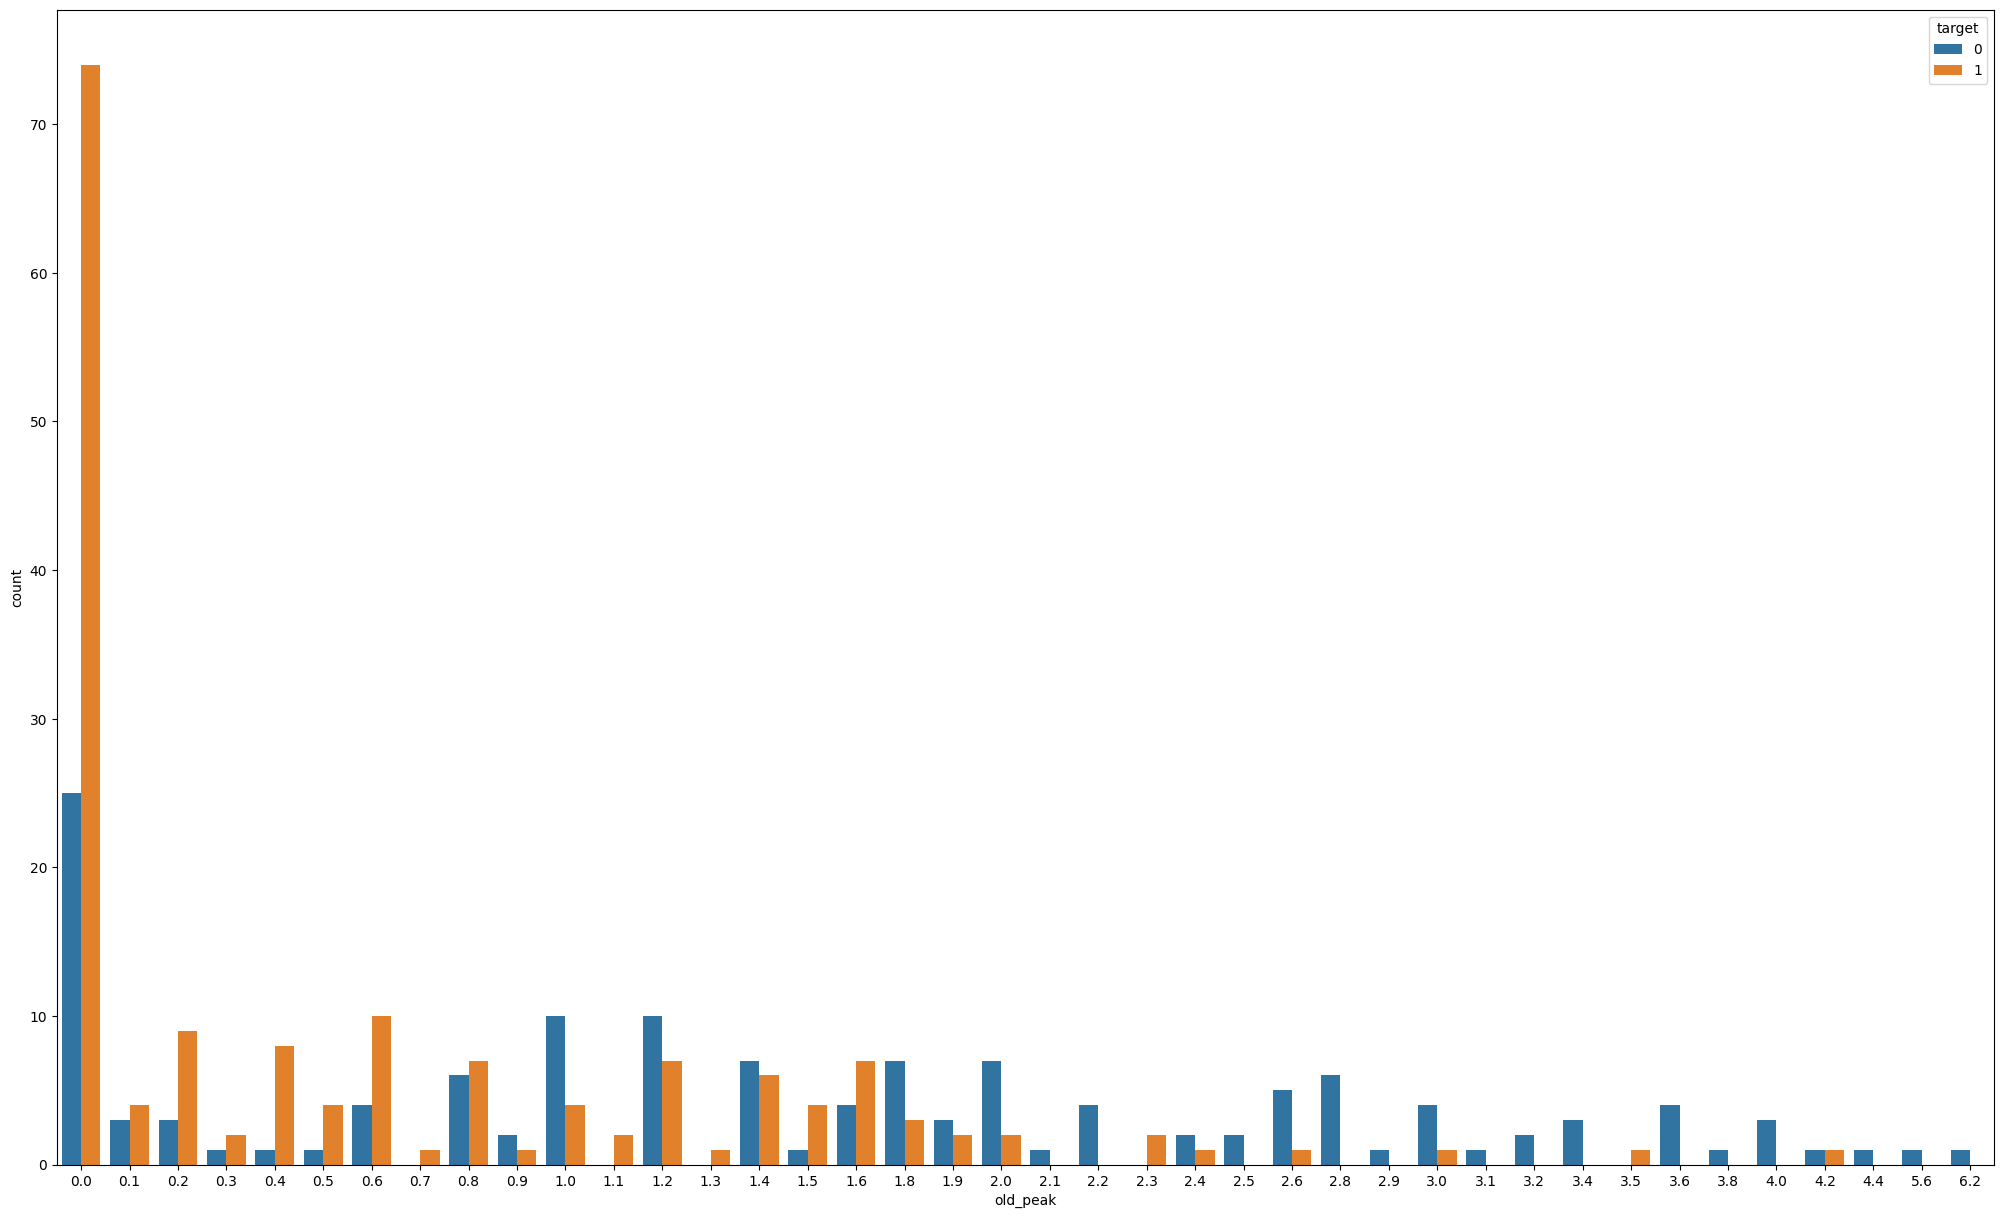

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(data=df, x='old_peak', hue='target')

In [ ]:
correlation=df.corr()

<Axes: >

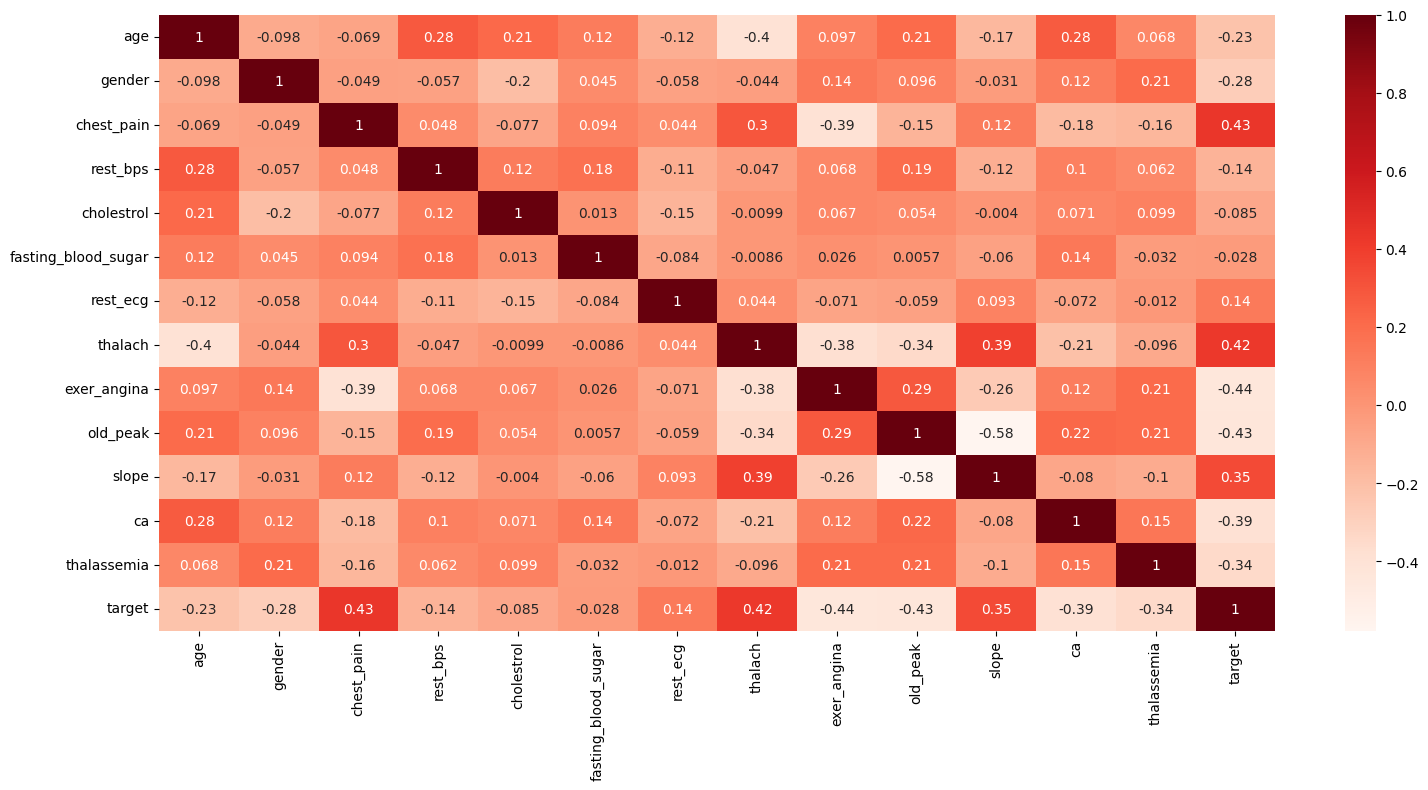

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(correlation,annot=True,cmap='Reds')

In [ ]:
df.head(0)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target


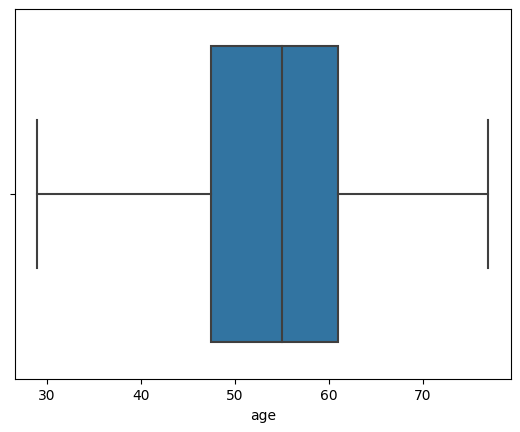

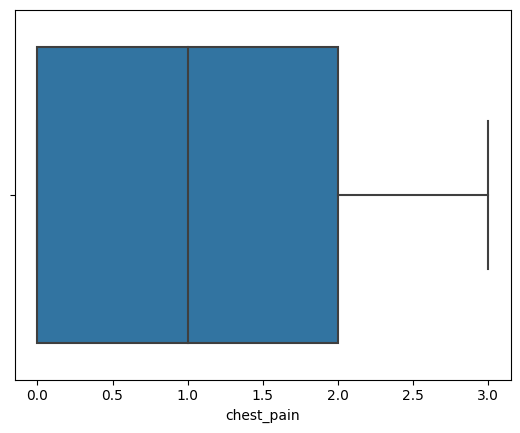

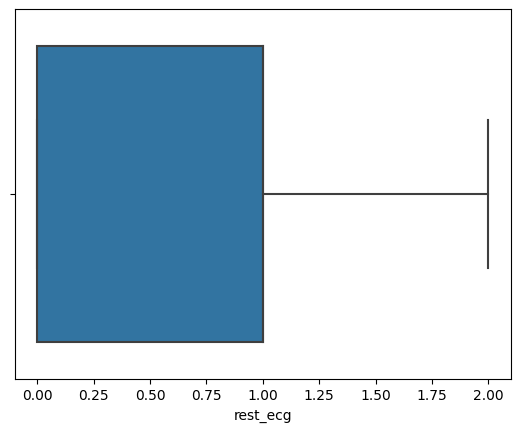

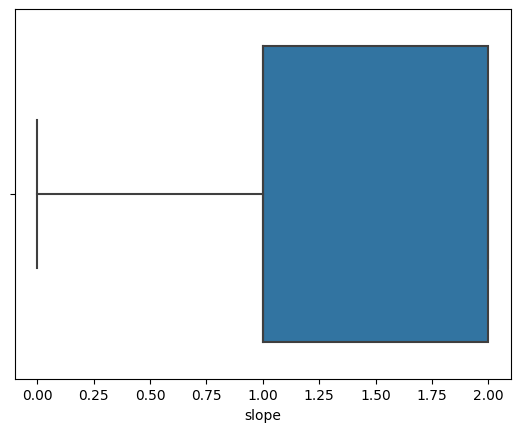

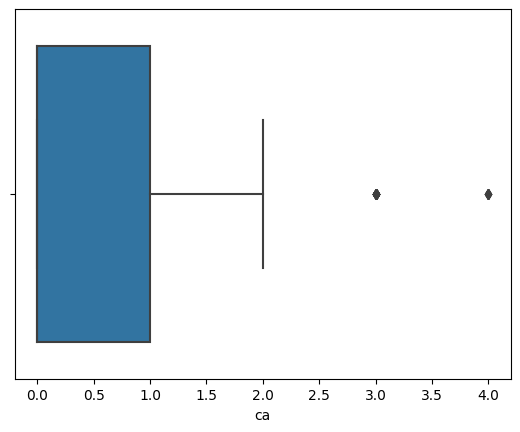

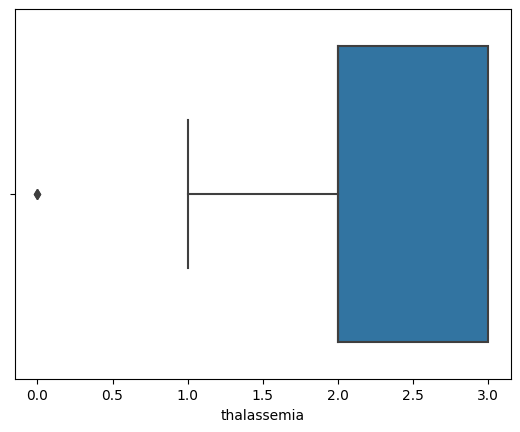

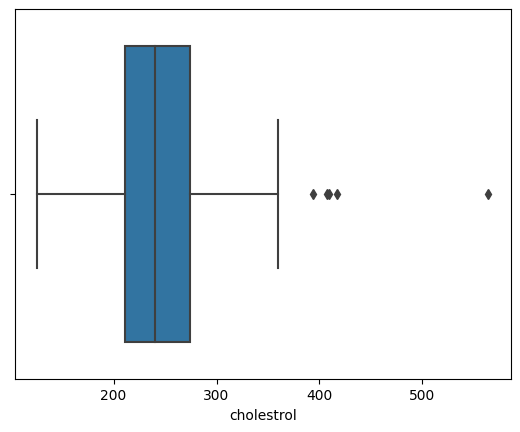

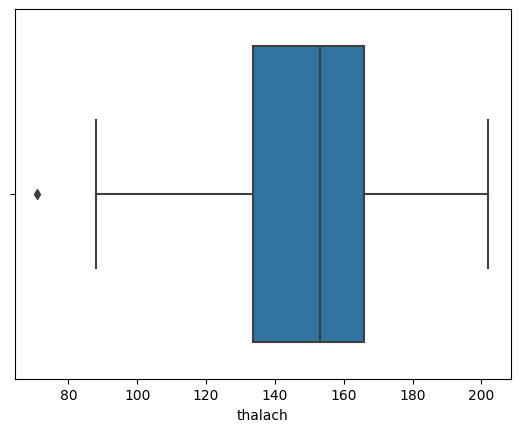

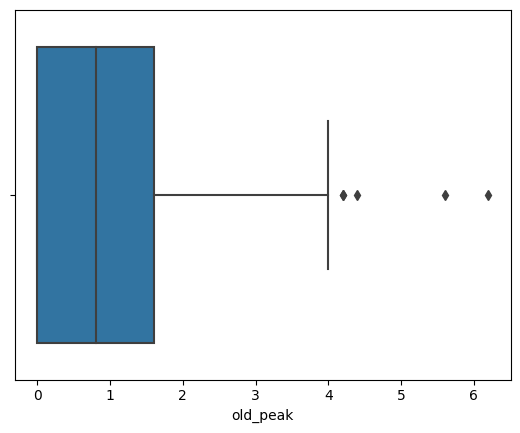

In [ ]:
cols=['age','chest_pain','rest_ecg','slope','ca','thalassemia','cholestrol','thalach','old_peak']
for i in cols:
    sns.boxplot(x=df[i],data=df,hue='target')
    plt.show()


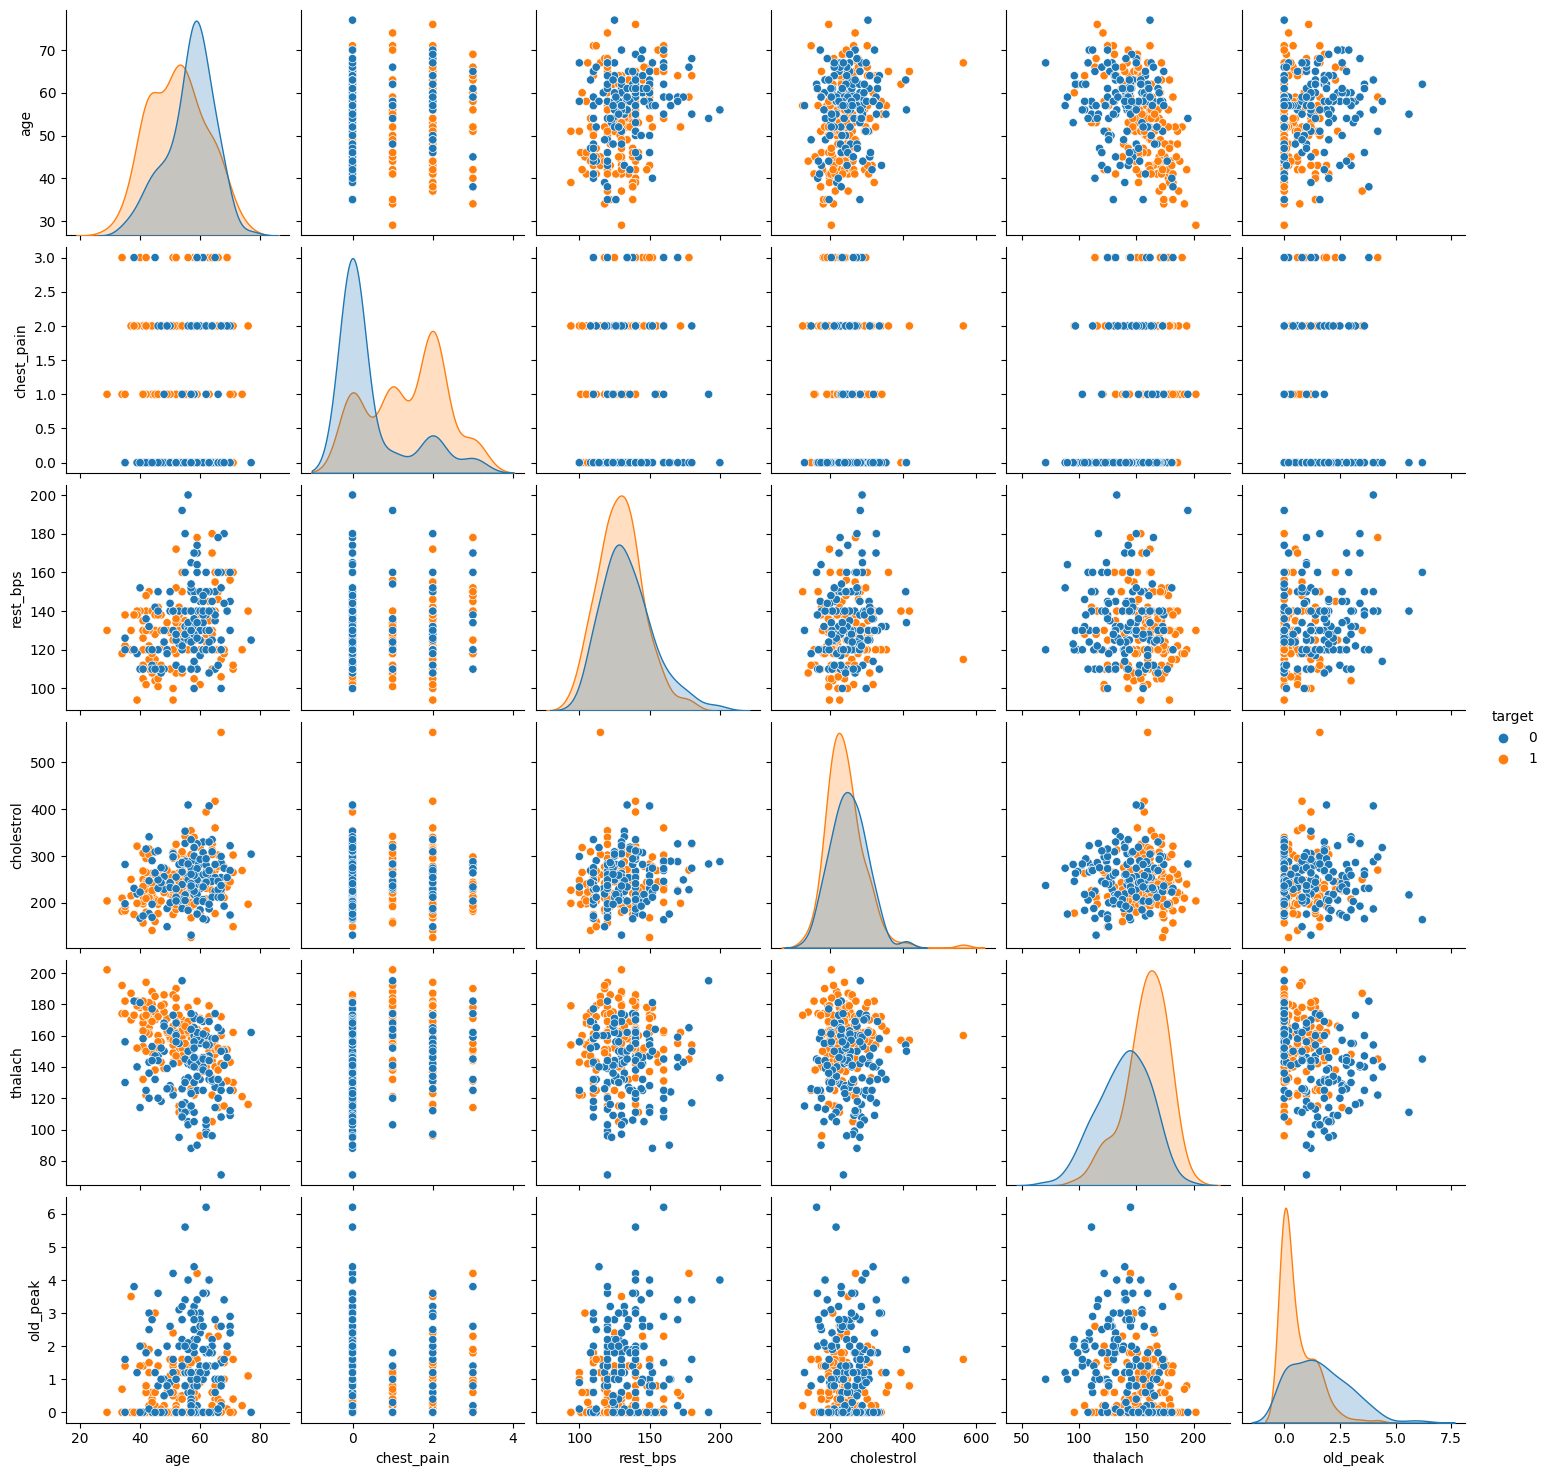

In [ ]:
sns.pairplot(data=df, hue='target', vars=['age', 'chest_pain', 'rest_bps', 'cholestrol', 'thalach', 'old_peak'])


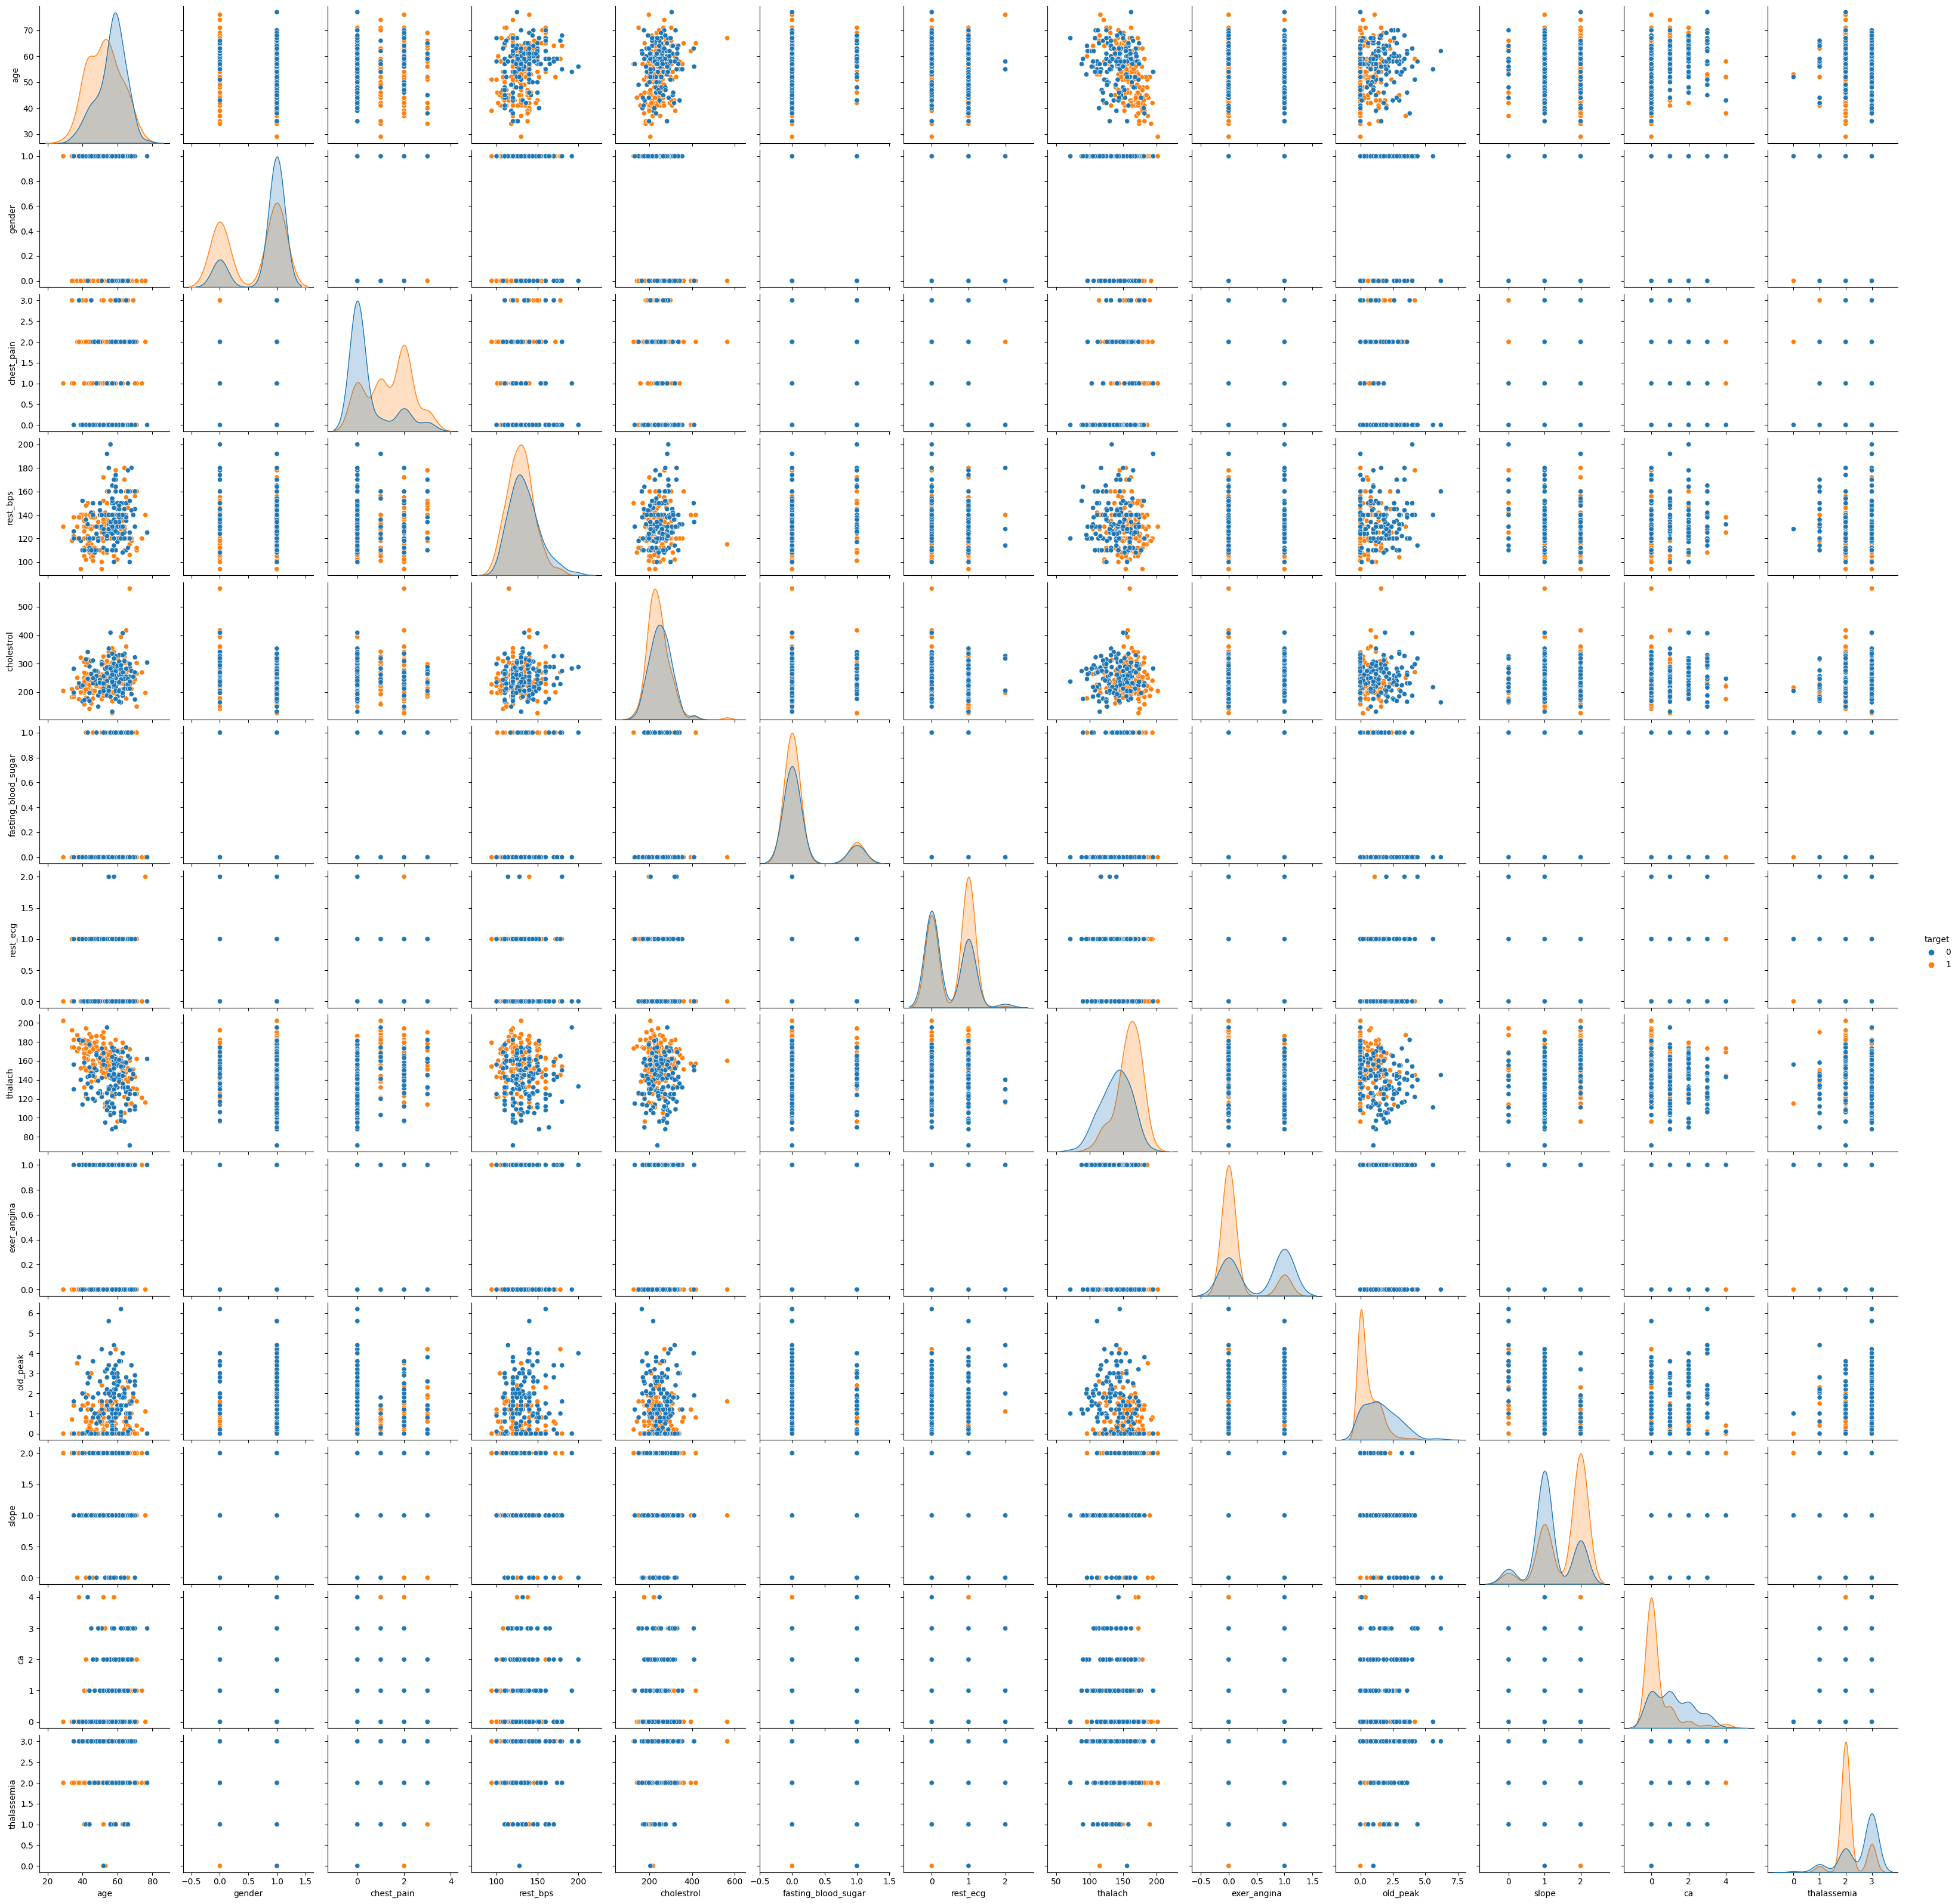

In [ ]:
sns.pairplot(data=df,hue='target')

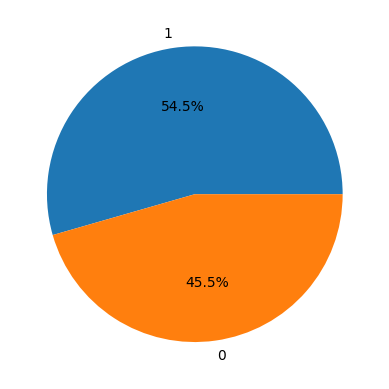

In [ ]:
plt.pie(df['target'].value_counts(),labels=df['target'].value_counts().index,autopct='%1.1f%%');

In [ ]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

# Extracting the target column into separate vectors for training set and test set

In [ ]:
x= df.drop("target", axis=1)

y = df.pop("target")


In [ ]:
x.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Splitting data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [ ]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (212, 13)
X_test (91, 13)
train_labels (212,)
test_labels (91,)


# Building a Decision Tree Classifier

In [ ]:
dt_model=DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [ ]:
dt_model.score(x_train,train_labels)

1.0

In [ ]:
dt_model.score(x_test,test_labels)

0.7362637362637363

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Project_Tree_File = open('Project_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model,
                                out_file=Project_Tree_File,
                                feature_names = list(x_train),
                                class_names = list(train_char_label))
Project_Tree_File.close()


In [ ]:
from google.colab import files
files.download("Project_Tree_File.dot")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Variable Importance


In [ ]:
dt_model.feature_importances_

array([0.10820677, 0.01713481, 0.31774899, 0.05925931, 0.09016647,
       0.        , 0.0142537 , 0.0457325 , 0.11895301, 0.06844208,
       0.        , 0.11616361, 0.04393875])

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))


                          Imp
chest_pain           0.317749
exer_angina          0.118953
ca                   0.116164
age                  0.108207
cholestrol           0.090166
old_peak             0.068442
rest_bps             0.059259
thalach              0.045732
thalassemia          0.043939
gender               0.017135
rest_ecg             0.014254
fasting_blood_sugar  0.000000
slope                0.000000


# Predicting Test Data

In [ ]:
ytrain_predict=dt_model.predict(x_train)
ytest_predict=dt_model.predict(x_test)


In [ ]:
ytest_predict.shape

(91,)

In [ ]:
# Accuracy  on  train data
dt_model.score(x_train,train_labels)

1.0

In [ ]:
# Accuracy  on  test data
dt_model.score(x_test,test_labels)

0.7362637362637363

<Axes: >

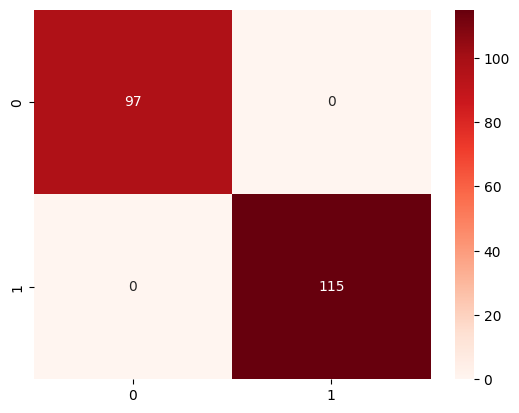

In [ ]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g',cmap='Reds')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



<Axes: >

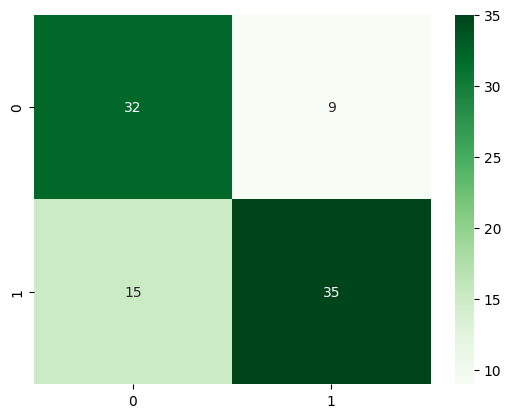

In [ ]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g',cmap='Greens')

In [ ]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



# Regularising the Decision Tree

# Adding Tuning Parameters

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,min_samples_leaf=50,min_samples_split=200, random_state=1)
reg_dt_model.fit(x_train, train_labels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=200,
                       random_state=1)

# Generating New Tree

In [ ]:
Project_Tree_regularized = open('Project_Tree_regularized_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= Project_Tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

Project_Tree_regularized.close()
dot_data

In [ ]:
from google.colab import files
files.download("Project_Tree_regularized_File.dot")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
reg_dt_model.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))


                     Imp
chest_pain           1.0
age                  0.0
gender               0.0
rest_bps             0.0
cholestrol           0.0
fasting_blood_sugar  0.0
rest_ecg             0.0
thalach              0.0
exer_angina          0.0
old_peak             0.0
slope                0.0
ca                   0.0
thalassemia          0.0


# Predicting on Training and Test dataset

In [ ]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

In [ ]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (212,)
ytest_predict (91,)


In [ ]:
# Accuracy  on  train data
reg_dt_model.score(x_train,train_labels)

0.7830188679245284

In [ ]:
# Accuracy  on  test data
reg_dt_model.score(x_test,test_labels)

0.7032967032967034

<Axes: >

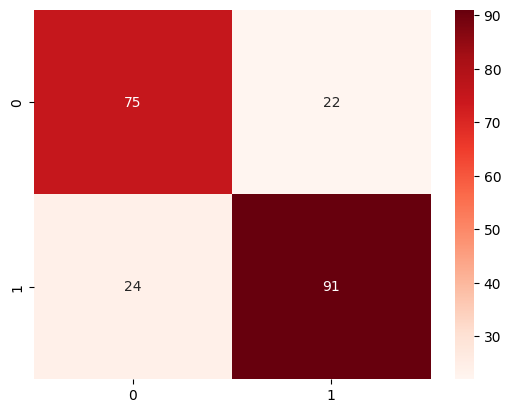

In [ ]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g',cmap='Reds')

In [ ]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77        97
           1       0.81      0.79      0.80       115

    accuracy                           0.78       212
   macro avg       0.78      0.78      0.78       212
weighted avg       0.78      0.78      0.78       212



<Axes: >

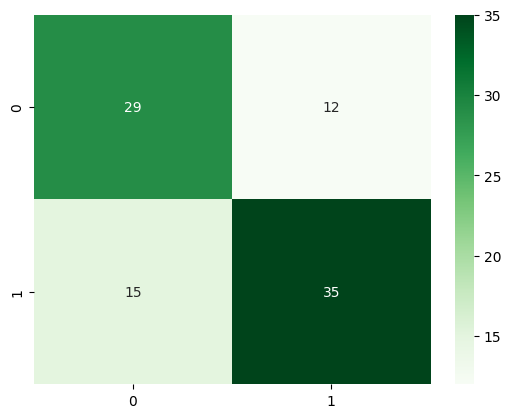

In [ ]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g',cmap='Greens')

In [ ]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.74      0.70      0.72        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



# Getting the Predicted Classes

In [ ]:
ytest_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1])

# Getting the Predicted Probabilities

In [ ]:
 pd.DataFrame(ytest_predict_prob).head()

NameError: ignored

# Model Evaluation

# Measuring AUC-ROC Curve

# AUC and ROC for the training data

AUC: 0.782


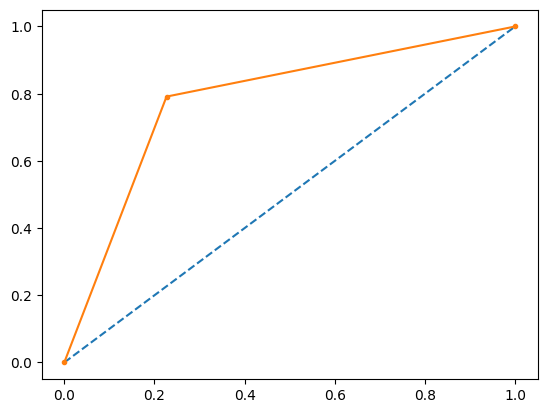

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the test data

AUC: 0.704


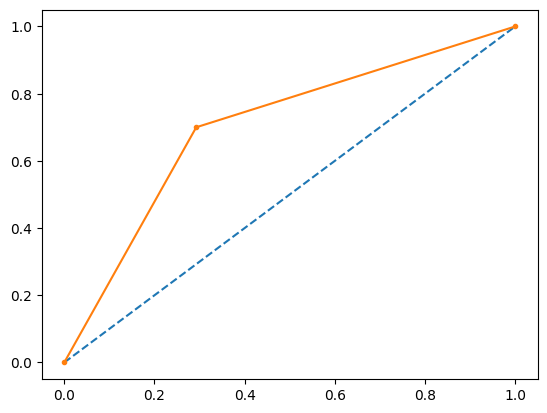

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Confusion Matrix for the training data

In [ ]:
confusion_matrix(train_labels,ytrain_predict)

array([[75, 22],
       [24, 91]])

In [ ]:
#Train Data Accuracy
reg_dt_model.score(x_train,train_labels)

0.7830188679245284

In [ ]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77        97
           1       0.81      0.79      0.80       115

    accuracy                           0.78       212
   macro avg       0.78      0.78      0.78       212
weighted avg       0.78      0.78      0.78       212



# Confusion Matrix for the test data

In [ ]:
confusion_matrix(test_labels, ytest_predict)

array([[29, 12],
       [15, 35]])

In [ ]:
#Test Data Accuracy
reg_dt_model.score(x_test,test_labels)

0.7032967032967034

In [ ]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.74      0.70      0.72        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



# Applying GridsearchCv

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
grid={'max_depth':[2,3,4],
      'min_samples_split':[10,20,30],
      'min_samples_leaf':[15,25],
      'max_features':[4,6,8]}

In [ ]:
model=DecisionTreeClassifier(random_state=1)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [15, 25],
                         'min_samples_split': [10, 20, 30]})

In [ ]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 10}

In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
best_model.score(x_train,train_labels)

0.8726415094339622

In [ ]:
best_model.score(x_test,test_labels)

0.7142857142857143

In [ ]:
dt_model=DecisionTreeClassifier(max_depth=3,random_state=1,max_features=4,min_samples_leaf=10,min_samples_split=30)

In [ ]:
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=10,
                       min_samples_split=30, random_state=1)

In [ ]:
dt_model.score(x_train,train_labels)

0.8018867924528302

In [ ]:
dt_model.score(x_test,test_labels)

0.7692307692307693

In [ ]:
best_model.feature_importances_

array([0.08657575, 0.        , 0.51790473, 0.        , 0.00154212,
       0.        , 0.        , 0.00977569, 0.17065128, 0.        ,
       0.03941993, 0.1741305 , 0.        ])

In [ ]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))


                          Imp
chest_pain           0.517905
ca                   0.174131
exer_angina          0.170651
age                  0.086576
slope                0.039420
thalach              0.009776
cholestrol           0.001542
gender               0.000000
rest_bps             0.000000
fasting_blood_sugar  0.000000
rest_ecg             0.000000
old_peak             0.000000
thalassemia          0.000000


In [ ]:
ytrain_predict=dt_model.predict(x_train)
ytest_predict=dt_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

<Axes: >

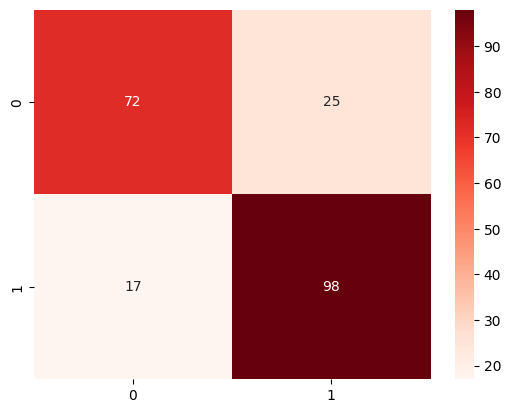

In [ ]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g',cmap='Reds')

In [ ]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        97
           1       0.80      0.85      0.82       115

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



<Axes: >

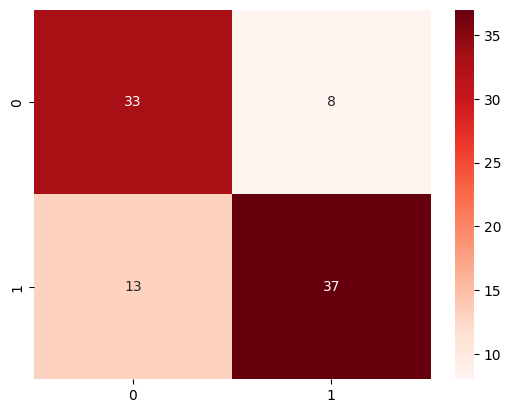

In [ ]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g',cmap='Reds')

In [ ]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



# Conclusion
Accuracy on the Training Data: 8O%

Accuracy on the Test Data: 77%

AUC on the Training Data: 78.9%

AUC on the Test: 70.1%

# Accuracy, AUC, Precision and Recall for test data is almost inline with training data.
# This proves no overfitting or underfitting has happened, and overall the model is a good model for classification